# Developed versus Developing Country Opinion on:

__Opinion on China from 2005 - 2019__  
__Opinion on Russia from 2005 - 2019__  
__Opinion on US from 2005 - 2019__    

We know how individual countries rated their perceptions of China, the US and Russia. However, these countries exhibit different characteristics. In addition, their relationship to the country of influence is different, partly due to its status of development. 

__Research Question__: Is the perception of a country different between developed and developing countries?

***

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

Load in dataset for opinion of China

In [2]:
df = pd.read_excel(r'/Users/natalie_kraft/Documents/LAS/PewFavorableGlobalIndicators.xlsx')
df = df.replace('--',np.NaN)

# remove in instanced of china
df = df[df['Country'] != "China"]
#df = df[df['Country'] != "Russia"]
df

,Country,statusC,status,HeavilyIndebted,income,bri,GDP_C,stability,internetUse,tradeOpen,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Argentina,Developing,Developing,F,UM,F,11683.949622,0.02,74.294907,0.000004,...,45.0,NaN,NaN,54.0,40.0,53.0,NaN,41.0,41.0,47.0
1,Australia,Developed,Developed,F,High,F,57395.919466,0.98,86.545049,-0.000047,...,NaN,NaN,NaN,58.0,NaN,57.0,52.0,64.0,48.0,36.0
2,Bangladesh,Developing,LDC,F,LM,T,1698.350394,-1.03,18.020000,0.000041,...,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN
3,Bolivia,Developing,Developing,T,LM,T,3548.590153,-0.24,44.286142,-0.000039,...,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Brazil,Developing,Developing,F,UM,F,9001.234249,-0.36,70.434283,-0.000043,...,52.0,49.0,50.0,65.0,44.0,55.0,NaN,52.0,49.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Ukraine,Developed,T,F,LM,T,3096.817402,-1.83,62.553155,0.000029,...,NaN,NaN,NaN,NaN,22.0,21.0,NaN,NaN,NaN,32.0
236,United Kingdom,Developed,Developed,F,High,F,43043.227816,0.05,90.692009,0.000071,...,46.0,50.0,38.0,38.0,25.0,18.0,NaN,26.0,22.0,26.0
237,United States,Developed,Developed,F,High,F,62840.020239,0.48,88.498903,0.000036,...,49.0,49.0,37.0,37.0,19.0,22.0,NaN,29.0,21.0,18.0
238,Venezuela,Developing,Developing,F,UM,T,8583.068002,-1.34,64.313364,-0.000004,...,NaN,NaN,NaN,40.0,36.0,31.0,NaN,38.0,NaN,NaN


## Choose the variable of interest 

Your options include: 
- Developing verus Developed
- Heavily Indebted
- Income level (high, upper-middle, low-middle, low)
- BRI partner

In [3]:
# choose either "status", "statusC", "HeavilyIndebted", "income", "bri", "gov"
category = "status"

# choose a perception
# either "FavorChina", "UnfavorChina", "FavorRussia", "UnfavorRussia", "FavorUS", "UnfavorUS"
perception = "FavorChina"

In [4]:
df.groupby('Q')['Country'].count()

Q
FavorChina      59
FavorRussia     59
FavorUS         59
UnfavorChina    59
Name: Country, dtype: int64

In [5]:
# drop non-needed data labels 
 
categoricalChoices = ["status","statusC",  "HeavilyIndebted", "income", "bri", 
                      "GDP_C", "stability", "internetUse", "tradeOpen", "gov"]

categoricalChoices.remove(category)

df = df.drop(categoricalChoices, axis=1)


In [6]:
choices = {
    "status":["Developed", "Developing", "LDC", "T"],
    "statusC":["Developed", "Developing"],
    "HeavilyIndebted": ["T", "F"],
    "income":["UM", "LM", "High", "Low"],
    "bri":["T", "F"],  
    "gov":[1, 0]
}

choices[category]

['Developed', 'Developing', 'LDC', 'T']

In [14]:
question = df[df['Q'] == perception]
question

,Country,status,Q,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Argentina,Developing,FavorChina,NaN,NaN,NaN,NaN,NaN,32.0,34.0,...,45.0,NaN,NaN,54.0,40.0,53.0,NaN,41.0,41.0,47.0
1,Australia,Developed,FavorChina,NaN,NaN,NaN,NaN,NaN,NaN,52.0,...,NaN,NaN,NaN,58.0,NaN,57.0,52.0,64.0,48.0,36.0
2,Bangladesh,LDC,FavorChina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN
3,Bolivia,Developing,FavorChina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Brazil,Developing,FavorChina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.0,49.0,50.0,65.0,44.0,55.0,NaN,52.0,49.0,51.0
5,Bulgaria,Developed,FavorChina,NaN,NaN,NaN,NaN,NaN,44.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,Burkina Faso,LDC,FavorChina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,NaN
7,Canada,Developed,FavorChina,NaN,NaN,NaN,58.0,NaN,52.0,NaN,...,NaN,NaN,NaN,43.0,NaN,39.0,45.0,48.0,44.0,27.0
8,Chile,Developing,FavorChina,NaN,NaN,NaN,NaN,NaN,62.0,NaN,...,NaN,NaN,NaN,62.0,60.0,66.0,NaN,51.0,NaN,NaN
10,Colombia,Developing,FavorChina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,38.0,NaN,NaN,43.0,NaN,NaN


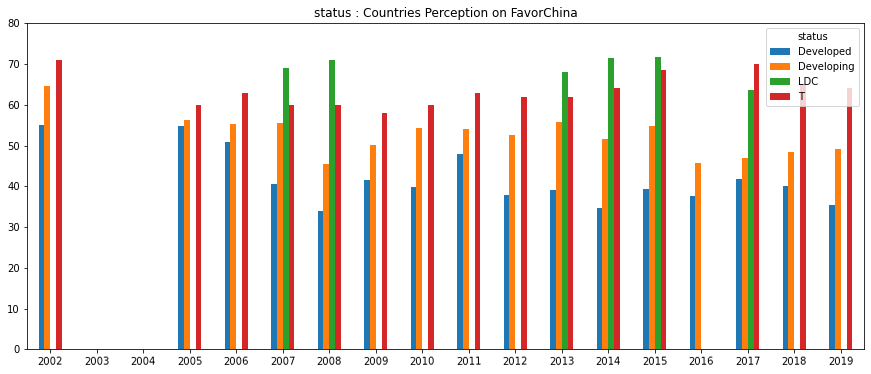

In [15]:
question = question.groupby(category).mean()

question = question.T

question.plot.bar(rot=1, ylim=(0,80),figsize=(15,6), title=category + " : Countries Perception on " + perception)

In [22]:

countrydf = df[df['Q'] != "UnfavorChina"]
favor = countrydf[countrydf['Country'] == "Sweden"]

favorMeans = favor.groupby('Q').mean()
favorMeans = favorMeans[[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]]

favorMeans = favorMeans.T

favor = favor.T
# favor = favor[favor['Country'] == 'Italy']

# favorMeans.plot.bar(rot=1, ylim=(20,70), figsize=(15,6), title= "Countries Perception on US/Russia/China")
# favorMeans.plot.line(rot=1, ylim=(20,70), figsize=(15,6), title= "Countries Perception on US/Russia/China")

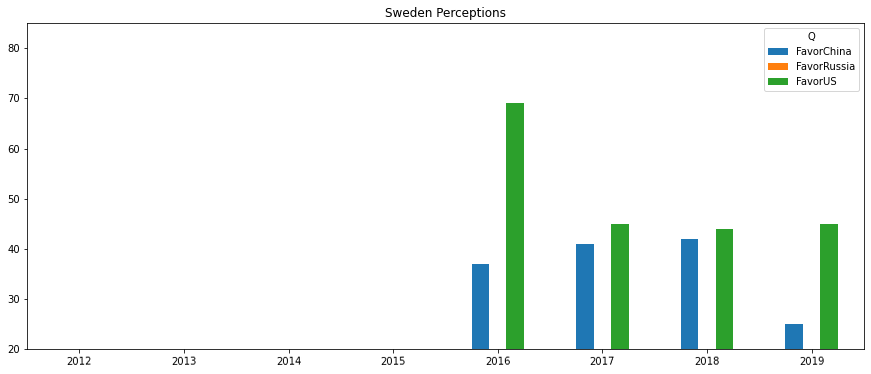

In [24]:
favorMeans.plot.bar(rot=1, ylim=(20,85), xlim=(2012,2019), figsize=(15,6), title="Sweden Perceptions")

In [ ]:
favor.T.groupby('Q')['Country'].count()

is.na(favor['2011'])

In [ ]:
# from bokeh.palettes import Spectral4
# from bokeh.plotting import figure, output_file, show

# x =['2002', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
#          '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

# p = figure(x_range= x, y_range= (0,1.2), plot_width=800, plot_height=250, toolbar_location=None, tools="")
# p.title.text = category + " : Countries Perception on " + perception

# p.vbar(x='years', top='counts', width = .2, color = 'color', legend_field=category, source=nquestion)

# # for data, name, color in zip([AAPL, IBM, MSFT, GOOG], ["AAPL", "IBM", "MSFT", "GOOG"], Spectral4):
# #     df = pd.DataFrame(data)
# #     df['date'] = pd.to_datetime(df['date'])
# #     p.bar(df['date'], df['close'], line_width=2, color=color, alpha=0.8, legend_label=name)

# p.legend.location = "top_left"
# p.legend.click_policy="hide"

# # output_file("interactive_legend.html", title="interactive_legend.py example")

# show(p)


# # fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
# # counts = [5, 3, 4, 2, 4, 6]

# # source = ColumnDataSource(data=dict(fruits=fruits, counts=counts, color=Spectral6))

# # p = figure(x_range=fruits, y_range=(0,9), plot_height=250, title="Fruit counts",
# #            toolbar_location=None, tools="")

# # p.vbar(x='fruits', top='counts', width=0.9, color='color', legend_field="fruits", source=source)

# # p.xgrid.grid_line_color = None
# # p.legend.orientation = "horizontal"
# # p.legend.location = "top_center"

# # show(p)

In [ ]:
# from bokeh.io import output_file, show
# from bokeh.models import ColumnDataSource
# from bokeh.palettes import Spectral6
# from bokeh.plotting import figure

# x =['2002', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
#          '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

# p = figure(x_range= x, y_range= (0,1.2), plot_width=800, plot_height=250, toolbar_location=None, tools="")
# p.title.text = category + " : Countries Perception on " + perception

# source = ColumnDataSource(df[df['Q'] == perception].groupby(category).mean())

# p.vbar(x='years', top='counts', width = .2, color = 'color', legend_field=category, source=source)


# p.xgrid.grid_line_color = None
# p.legend.orientation = "horizontal"
# p.legend.location = "top_center"

# show(p)